In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_roc_curve(y_true, y_pred_proba):
    """
    Plot ROC curve and calculate AUC score from predictions and true values.
    
    Parameters:
    -----------
    y_true : array-like
        True binary labels (0, 1)
    y_pred_proba : array-like
        Predicted probabilities for the positive class
        
    Returns:
    --------
    float
        AUC score
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    return roc_auc

In [3]:
def plot_multi_roc_curves(y_true_list, y_pred_proba_list, dimensions):
    """
    Plot ROC curves for multiple dimensions on the same figure.
    
    Parameters:
    -----------
    y_true_list : list of array-like
        List of true binary labels for each dimension
    y_pred_proba_list : list of array-like
        List of predicted probabilities for each dimension
    dimensions : list
        List of dimension values
    
    Returns:
    --------
    dict
        Dictionary of AUC scores for each dimension
    """
    plt.figure(figsize=(10, 8))
    auc_scores = {}
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(dimensions)))
    
    for (y_true, y_pred_proba, dim, color) in zip(y_true_list, y_pred_proba_list, dimensions, colors):
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        auc_scores[dim] = roc_auc
        
        plt.plot(fpr, tpr, color=color, lw=2, 
                label=f'Dim {dim} (AUC = {roc_auc:.2f})')
        plt.fill_between(fpr, tpr, alpha=0.1, color=color)
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=22)
    plt.ylabel('True Positive Rate', fontsize=22)
    plt.title('ROC Curves for Different Dimensions', fontsize=22)
    plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=22)
    plt.grid(True, alpha=0.3)
    
    return auc_scores

Results for dimensionality 9:
Accuracy: 0.9525
F1 Score: 0.9523
Precision: 0.9525
Recall: 0.9520
Results for dimensionality 12:
Accuracy: 0.5602
F1 Score: 0.5142
Precision: 0.5755
Recall: 0.4646
Results for dimensionality 15:
Accuracy: 0.5012
F1 Score: 0.5006
Precision: 0.4998
Recall: 0.5013
Results for dimensionality 18:
Accuracy: 0.4988
F1 Score: 0.5050
Precision: 0.5033
Recall: 0.5067


{9: np.float64(0.960576690403761),
 12: np.float64(0.6012647778188273),
 15: np.float64(0.5064242679059051),
 18: np.float64(0.4963592233946201)}

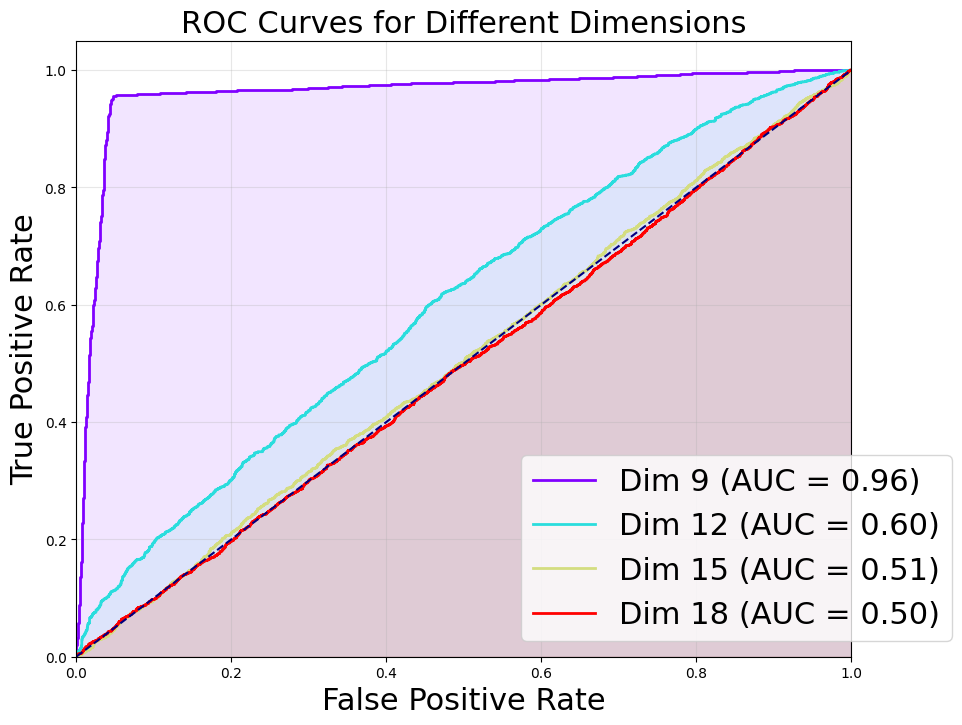

In [10]:
dimensionality = [9, 12, 15, 18]

y_true_list = []
y_pred_proba_list = []
accuracy_list = []
f1_list = []

for dim in dimensionality:
    pred = np.load(f'Datasets_Train_Test_Split/kryptonite_{dim}_pred_cluster_1.npy')
    y_true = np.load(f'Datasets_Train_Test_Split/kryptonite-{dim}-y_test.npy')
    y_true_list.append(y_true)
    y_pred_proba_list.append(pred)
    
	# Assuming your predictions are probabilities and binary classification
    y_pred = (pred >= 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Results for dimensionality {dim}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
plot_multi_roc_curves(y_true_list, y_pred_proba_list, dimensionality)


Results for dimensionality 9:
Accuracy: 0.4903
F1 Score: 0.4759
Precision: 0.4874
Recall: 0.4648
Results for dimensionality 12:
Accuracy: 0.5110
F1 Score: 0.4956
Precision: 0.5127
Recall: 0.4796
Results for dimensionality 15:
Accuracy: 0.4927
F1 Score: 0.4923
Precision: 0.4913
Recall: 0.4933
Results for dimensionality 18:
Accuracy: 0.4950
F1 Score: 0.4958
Precision: 0.4996
Recall: 0.4922


{9: np.float64(0.49549049734315737),
 12: np.float64(0.5066836991213864),
 15: np.float64(0.48494744851518945),
 18: np.float64(0.4993336631449973)}

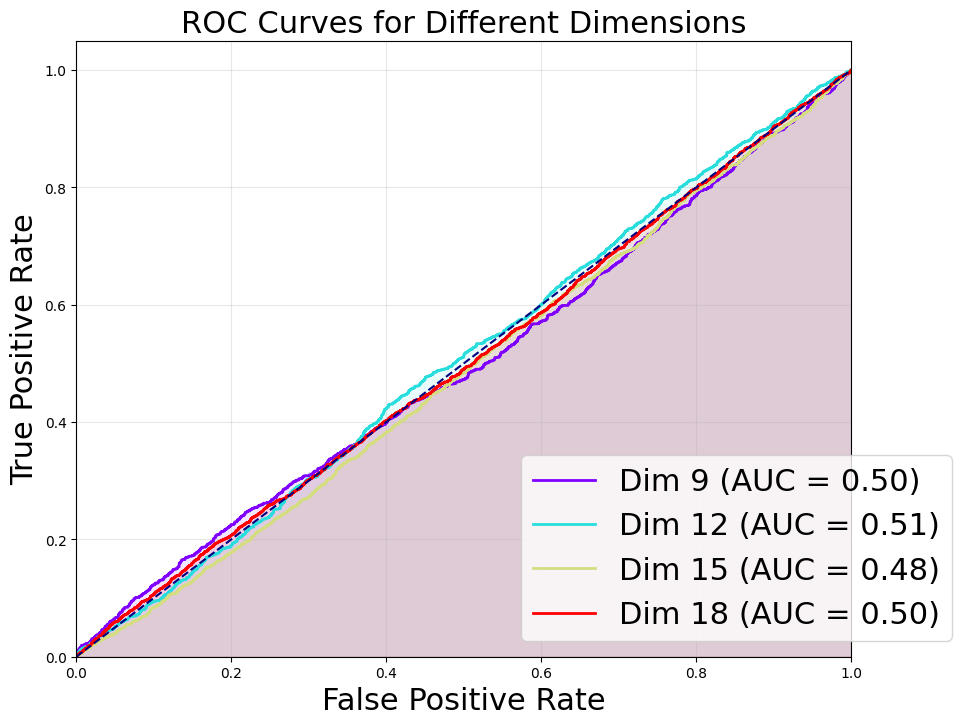

In [12]:
dimensionality = [9, 12, 15, 18]

y_true_list = []
y_pred_proba_list = []

for dim in dimensionality:
    pred = np.load(f'Datasets_Train_Test_Split/kryptonite_{dim}_pred_proba_logreg.npy')[:, 0]
    y_true = np.load(f'Datasets_Train_Test_Split/kryptonite-{dim}-y_test.npy')
    y_true_list.append(y_true)
    y_pred_proba_list.append(pred)
    
		# Assuming your predictions are probabilities and binary classification
    y_pred = (pred >= 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Results for dimensionality {dim}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
	
    
plot_multi_roc_curves(y_true_list, y_pred_proba_list, dimensionality)


Results for dimensionality 9:
Accuracy: 0.9572
F1 Score: 0.9570
Precision: 0.9581
Recall: 0.9559
Results for dimensionality 12:
Accuracy: 0.9196
F1 Score: 0.9199
Precision: 0.9180
Recall: 0.9218
Results for dimensionality 15:
Accuracy: 0.5185
F1 Score: 0.5343
Precision: 0.5160
Recall: 0.5538
Results for dimensionality 18:
Accuracy: 0.5047
F1 Score: 0.5087
Precision: 0.5092
Recall: 0.5081


{9: np.float64(0.9590550554085019),
 12: np.float64(0.9575649862916287),
 15: np.float64(0.522218935779099),
 18: np.float64(0.5098667627241209)}

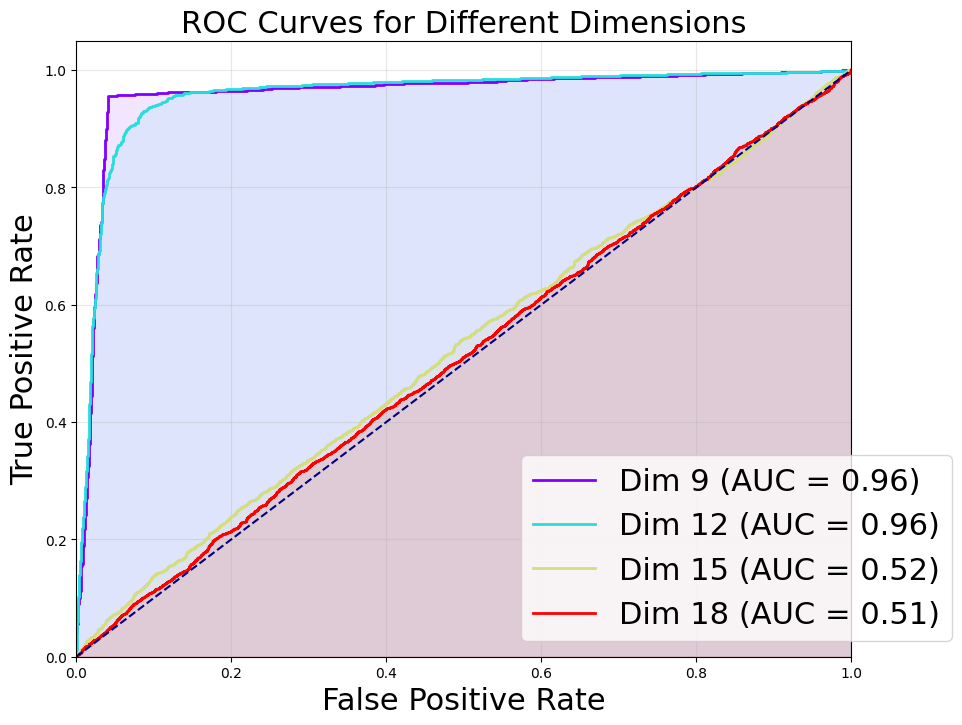

In [13]:
dimensionality = [9, 12, 15, 18]

y_true_list = []
y_pred_proba_list = []

for dim in dimensionality:
    pred = np.load(f'Datasets_Train_Test_Split/kryptonite_{dim}_pred_proba_rf.npy')[:,1]
    y_true = np.load(f'Datasets_Train_Test_Split/kryptonite-{dim}-y_test.npy')
    y_true_list.append(y_true)
    y_pred_proba_list.append(pred)
    
	# Assuming your predictions are probabilities and binary classification
    y_pred = (pred >= 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Results for dimensionality {dim}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
plot_multi_roc_curves(y_true_list, y_pred_proba_list, dimensionality)
